In [1]:
!python --version

Python 3.7.16


In [1]:
from Agent import Agent
#from NegotiationNet import NegotiationNet

import torch

import numpy as np

import os
os.chdir("..")
from rice import Rice

In [2]:
envs = [Rice(region_yamls_filename='identical_region_yamls/') for _ in range(5)]
initial_state = envs[0].reset()

In [3]:
agents = [Agent(envs[0], initial_state[agent_id], agent_id) for agent_id in range(envs[0].num_agents)]

In [4]:
rs = {agent.id : [] for agent in agents}
episode_length = envs[0].episode_length
for epoch in range(50):
    for batch in range(10):
        states = [env.reset() for env in envs]
        for t in range(envs[0].episode_length):
            collective_action = {}
            for agent in agents:
                collective_action[agent.id] = agent.negotiate(
                    [state[agent.id] for state in states]
                )
            #print(collective_action)
            for (i, env) in enumerate(envs):
                for agent in agents:
                    env.make_proposals(agent.id, np.array(collective_action[agent.id]['proposals'][i]))
            
            for env in envs:
                for agent in agents:
                    env.update_mask(agent.id, np.array(collective_action[agent.id]['decisions'][i]))
            
            collective_action = {}
            for agent in agents:
                collective_action[agent.id] = agent.act(
                    [state[agent.id] for state in states]
                )
            
            states, rewards, _, _ = zip(*[
                env.step({agent_id : collective_action[agent_id][i] 
                        for agent_id in range(len(agents))}) 
                for (i, env) in enumerate(envs)
            ])

            for agent in agents:
                r = [reward[agent.id] for reward in rewards]
                rs[agent.id].append(r)
                for net in agent.nets:
                    agent.nets[net].buffer.rewards.extend(r)    
                    agent.nets[net].buffer.is_terminals.extend([t == episode_length - 1] * len(envs))
    print(f'update: {epoch}')
    for agent in agents:
        agent.update()

update: 0
update: 1
update: 2
update: 3
update: 4
update: 5
update: 6
update: 7
update: 8
update: 9
update: 10
update: 11
update: 12
update: 13
update: 14
update: 15
update: 16
update: 17
update: 18
update: 19
update: 20
update: 21
update: 22
update: 23
update: 24
update: 25
update: 26
update: 27
update: 28
update: 29
update: 30
update: 31
update: 32
update: 33
update: 34
update: 35
update: 36
update: 37
update: 38
update: 39
update: 40
update: 41
update: 42
update: 43
update: 44
update: 45
update: 46
update: 47
update: 48
update: 49


In [5]:
rss = {k: np.array(rs[k]).mean(axis=1) for k in rs}

In [9]:
import matplotlib.pyplot as plt

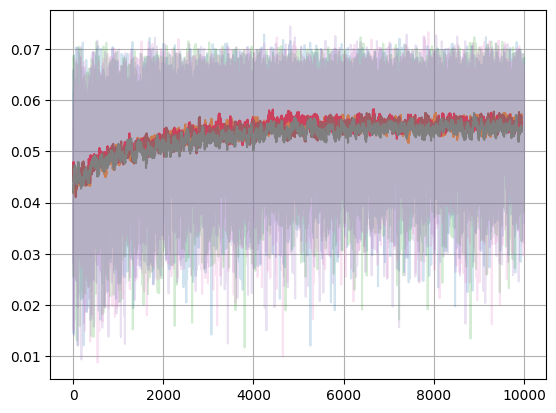

In [13]:
for r in rss:
    plt.plot(rss[r], alpha = .2)
    plt.plot(np.convolve(rss[r], np.ones(50)/50, mode='valid'), label = f'Agent {r}')

plt.grid()
plt.show()

In [4]:
_ = agents[0].act(initial_state[0])
_ = agents[0].make_proposals(initial_state[0])
_ = agents[0].make_decisions(initial_state[0])

_ = agents[0].act(initial_state[0])
_ = agents[0].make_proposals(initial_state[0])
_ = agents[0].make_decisions(initial_state[0])

In [5]:
agents[0].nets['activityNet'].buffer.rewards.extend([.5, .5])
agents[0].nets['proposalNet'].buffer.rewards.extend([.5, .5])
agents[0].nets['decisionNet'].buffer.rewards.extend([.5, .5])

agents[0].nets['activityNet'].buffer.is_terminals.extend([0, 1])
agents[0].nets['proposalNet'].buffer.is_terminals.extend([0, 1])
agents[0].nets['decisionNet'].buffer.is_terminals.extend([0, 1])

In [ ]:
agents[0].update()